In [262]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Loading the Data

In [263]:
trainDf = pd.read_csv('train.csv')
testDf = pd.read_csv('test.csv')
combined = [trainDf, testDf]

In [264]:
trainDf.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


# Exploring

In [265]:
total_survived_rate = trainDf['Survived'].mean()
print(f'Total survive rate {total_survived_rate:.2f}')

Total survive rate 0.38


In [266]:
trainDf.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [267]:
trainDf.describe(include='O')

,Name,Sex,Ticket,Cabin,Embarked
count,891,891,891,204,889
unique,891,2,681,147,3
top,"Braund, Mr. Owen Harris",male,347082,B96 B98,S
freq,1,577,7,4,644


In [268]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


#### Age have some missing values and cabin have a lot of missing values

In [269]:
trainDf[['SibSp', 'Survived']].groupby(['SibSp'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,SibSp,Survived
1,1,0.535885
2,2,0.464286
0,0,0.345395
3,3,0.250000
4,4,0.166667
5,5,0.000000
6,8,0.000000


In [270]:
trainDf[['Parch', 'Survived']].groupby(['Parch'], as_index=False).mean().sort_values(by='Survived', ascending=False)

,Parch,Survived
3,3,0.600000
1,1,0.550847
2,2,0.500000
0,0,0.343658
5,5,0.200000
4,4,0.000000
6,6,0.000000


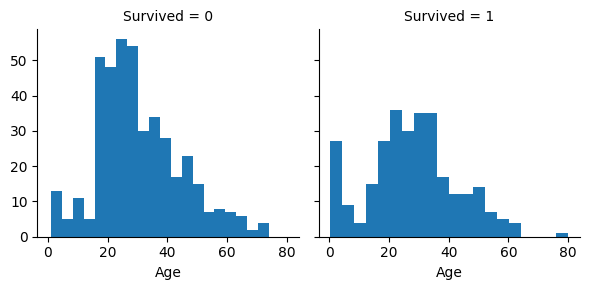

In [271]:
import seaborn as sns

g = sns.FacetGrid(trainDf, col='Survived')
g.map(plt.hist, 'Age', bins=20)

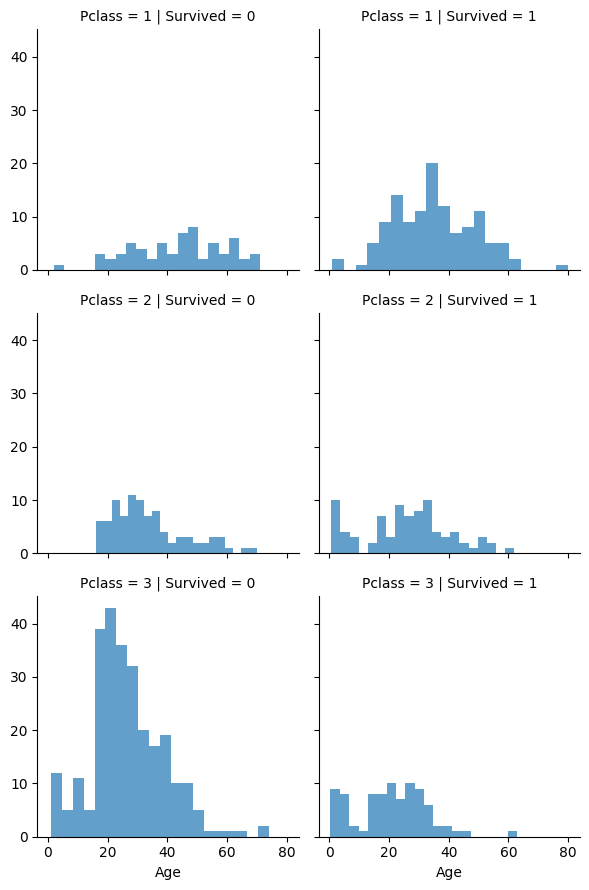

In [272]:
grid = sns.FacetGrid(trainDf, col='Survived', row='Pclass')
grid.map(plt.hist, 'Age', alpha=.7, bins=20)

### from the previous plot we can easily see that Pclass have huge effect in the survive rate

In [273]:
trainDf[['Pclass', 'Survived']].groupby(['Pclass'], as_index=False).mean()

,Pclass,Survived
0,1,0.629630
1,2,0.472826
2,3,0.242363


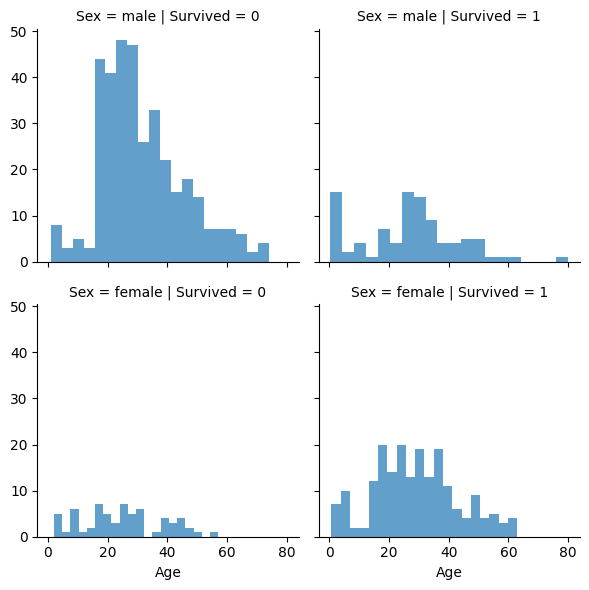

In [274]:
grid = sns.FacetGrid(trainDf, col='Survived', row='Sex')
grid.map(plt.hist, 'Age', alpha=.7, bins=20)

In [275]:
trainDf[['Sex', 'Survived']].groupby(['Sex'], as_index=False).mean()

,Sex,Survived
0,female,0.742038
1,male,0.188908


### Females have much higher survive rate

# Data Cleaning & Preparing

In [276]:
for df in combined:
    df.drop(['Ticket', 'Cabin', 'PassengerId', 'Name'], inplace=True, axis=1)
trainDf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,male,22.0,1,0,7.2500,S
1,1,1,female,38.0,1,0,71.2833,C
2,1,3,female,26.0,0,0,7.9250,S
3,1,1,female,35.0,1,0,53.1000,S
4,0,3,male,35.0,0,0,8.0500,S


In [277]:
for df in combined:
    df['Sex'] = df['Sex'].map({'male': 1, 'female': 0}) # converting sex to boolean, male = 1 , female = 0
trainDf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,S
1,1,1,0,38.0,1,0,71.2833,C
2,1,3,0,26.0,0,0,7.9250,S
3,1,1,0,35.0,1,0,53.1000,S
4,0,3,1,35.0,0,0,8.0500,S


In [278]:
trainDf['Embarked'].value_counts()

S    644
C    168
Q     77
Name: Embarked, dtype: int64

In [279]:
trainDf['Embarked'].isnull().sum()

2

#### We have 2 null values in the Embarked column let's fill them with the most frequent ('S')

In [280]:
for df in combined:
    trainDf['Embarked'].fillna('S', inplace=True)
trainDf['Embarked'].isnull().sum()

0

In [281]:
for df in combined:
    df['Embarked'] = df['Embarked'].map({'S': 2,'C': 1, 'Q': 0}).astype(int)
trainDf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,0,3,1,22.0,1,0,7.2500,2
1,1,1,0,38.0,1,0,71.2833,1
2,1,3,0,26.0,0,0,7.9250,2
3,1,1,0,35.0,1,0,53.1000,2
4,0,3,1,35.0,0,0,8.0500,2


### Now i will convert the SibSp and Parch columns to single column tells me if the person have any family member or no

In [282]:
for df in combined:    
    df['Have_family_members'] = (df['SibSp'] + df['Parch']) > 0

In [283]:
trainDf.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,Have_family_members
0,0,3,1,22.0,1,0,7.2500,2,True
1,1,1,0,38.0,1,0,71.2833,1,True
2,1,3,0,26.0,0,0,7.9250,2,False
3,1,1,0,35.0,1,0,53.1000,2,True
4,0,3,1,35.0,0,0,8.0500,2,False


In [284]:
#dropping the two columns
for df in combined:
    df.drop(['SibSp', 'Parch'], inplace=True, axis=1)
trainDf.head()

,Survived,Pclass,Sex,Age,Fare,Embarked,Have_family_members
0,0,3,1,22.0,7.2500,2,True
1,1,1,0,38.0,71.2833,1,True
2,1,3,0,26.0,7.9250,2,False
3,1,1,0,35.0,53.1000,2,True
4,0,3,1,35.0,8.0500,2,False


In [219]:
trainDf.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 7 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Survived             891 non-null    int64  
 1   Pclass               891 non-null    int64  
 2   Sex                  891 non-null    int64  
 3   Age                  714 non-null    float64
 4   Fare                 891 non-null    float64
 5   Embarked             891 non-null    int32  
 6   Have_family_members  891 non-null    bool   
dtypes: bool(1), float64(2), int32(1), int64(3)
memory usage: 39.3 KB


## Age Handling

In [285]:
age_median = (trainDf['Age'].median() + testDf['Age'].median() ) / 2
for df in combined:
    df['Age'].fillna(age_median, inplace=True)
trainDf['Age'].isnull().sum()

0

In [288]:
X_train = trainDf.drop('Survived', axis=1)
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,Have_family_members
0,3,1,22.0,7.2500,2,True
1,1,0,38.0,71.2833,1,True
2,3,0,26.0,7.9250,2,False
3,1,0,35.0,53.1000,2,True
4,3,1,35.0,8.0500,2,False


In [289]:
y_train = trainDf['Survived']
y_train

0      0
1      1
2      1
3      1
4      0
      ..
886    0
887    1
888    0
889    1
890    0
Name: Survived, Length: 891, dtype: int64

In [286]:
testDf.head()

,Pclass,Sex,Age,Fare,Embarked,Have_family_members
0,3,1,34.5,7.8292,0,False
1,3,0,47.0,7.0000,2,True
2,2,1,62.0,9.6875,0,False
3,3,1,27.0,8.6625,2,False
4,3,0,22.0,12.2875,2,True


In [293]:
X_train.head()

,Pclass,Sex,Age,Fare,Embarked,Have_family_members
0,3,1,22.0,7.2500,2,True
1,1,0,38.0,71.2833,1,True
2,3,0,26.0,7.9250,2,False
3,1,0,35.0,53.1000,2,True
4,3,1,35.0,8.0500,2,False


In [299]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
Rf = RandomForestClassifier()

Rf_scores = cross_val_score(Rf, X_train, y_train, scoring="accuracy", cv =5)
Rf_scores

array([0.77094972, 0.80898876, 0.84269663, 0.76966292, 0.81460674])

In [300]:
Rf.fit(X_train, y_train)

RandomForestClassifier()

In [301]:
Rf.predict(testDf)

ValueError: Input X contains NaN.
RandomForestClassifier does not accept missing values encoded as NaN natively. For supervised learning, you might want to consider sklearn.ensemble.HistGradientBoostingClassifier and Regressor which accept missing values encoded as NaNs natively. Alternatively, it is possible to preprocess the data, for instance by using an imputer transformer in a pipeline or drop samples with missing values. See https://scikit-learn.org/stable/modules/impute.html You can find a list of all estimators that handle NaN values at the following page: https://scikit-learn.org/stable/modules/impute.html#estimators-that-handle-nan-values